In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn import preprocessing, cross_validation
import pandas as pd
import xgboost
from sklearn.metrics import fbeta_score, make_scorer

from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [21]:
#reading data file
file = r'data.xls'
data = pd.read_excel('https://query.data.world/s/swx6vzqc5vwjo4mhia4sxylvzgd6pq')
#naming important columns
data.rename(columns={'Unnamed: 5':'Fund2008','FUNDING':'Years','Unnamed: 6':'Fund2009','Unnamed: 7':'Fund2010'},inplace=True)
data.convert_objects(convert_numeric=True)
data['Fund2008'] = data.iloc[1:,5]
data['Fund2009'] = data.iloc[1:,6]
data['Fund2010'] = data.iloc[1:,7]
#Filling n/a values with mean



/home/mayank/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [68]:
# Stage 1 
#calculation of questions

data.fillna(value = 0,inplace=True)
data.iloc[1:,5].replace(0,data["Fund2008"].mean(),inplace=True)
data.iloc[1:,6].replace(0,data["Fund2009"].mean(),inplace=True)
data.iloc[1:,7].replace(0,data["Fund2010"].mean(),inplace=True)

for i in range(1,len(data)):
    t = ((float(data.iloc[i][6]) - data.iloc[i][5])/abs(data.iloc[i][5]))*100.00
    
    if(t>0):
       print('1')
    else:
      print('0')

1
0
0
1
1
0
1
1
1
1
0
0
1
1
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
1
1
1
0
0
0
0
1
0
0
0
1
1
0
0
0
1
1
0
1
1
0
1
0
1
0
0
1
1
1
0
1
0
1
1
1
0
0
0
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
0
1
1
1
0
1
0
1
0
0
1
1
1
1
1
0
0
0
1
0
0
1
1
1
1
0
1
0
0
1
1
0
1
0
1
1
1
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
0
0
1
0
1
1
1
1
1
1
1
0
1
1
0
0
1
0
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
0
0
0
1
1
1
0
0
1
1
1
1
1
1


In [69]:
#Stage 2 - A function to handle non numeric data to make distribution graphs
def handle_non_numerical_data(data):
    columns = data.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if  data[column].dtype != np.int64 and data[column].dtype != np.float64:
            column_contents = data[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            data[column] = list(map(convert_to_int, data[column]))

    return data

data = handle_non_numerical_data(data)


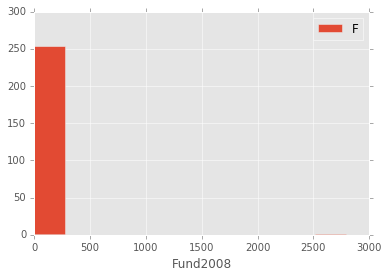

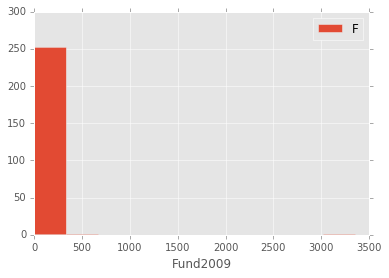

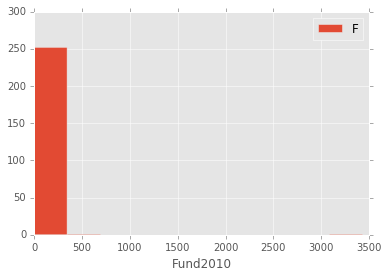

In [32]:
#Graphs of Funding variables
data['Fund2008'].hist()
plt.legend("Fund2008")
plt.xlabel("Fund2008")
plt.show()
data['Fund2009'].hist()
plt.legend("Fund2009")
plt.xlabel("Fund2009")
plt.show()
data['Fund2010'].hist()
plt.legend("Fund2010")
plt.xlabel("Fund2010")
plt.show()

255


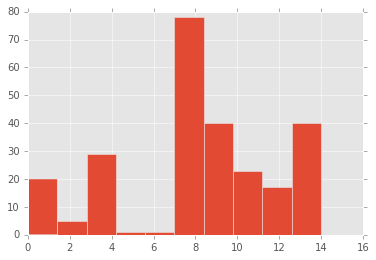

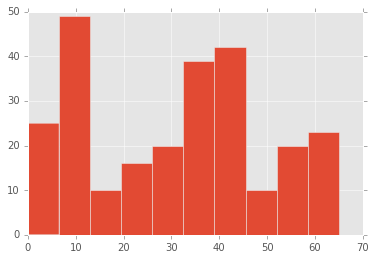

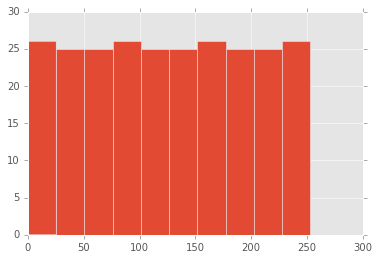

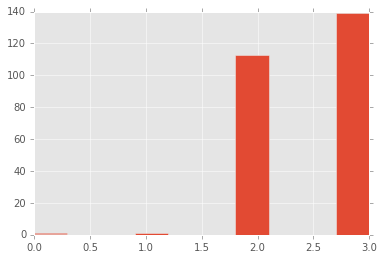

In [51]:

#plotting graphs of non funding datas
#similarly all the plots can be 
data["Unnamed: 1"].hist()
plt.show()
data["Unnamed: 2"].hist()
plt.show()
data["Unnamed: 3"].hist()
plt.show()
data["Unnamed: 8"].hist()
plt.show()

In [53]:
#Stage 3
#Splitting the data into 70-30 ratio to fit in classifier XGBoost
#I have selected Funding years to train the model
#and it will predict the "STEM" of the agency
#that is whether the company is "General Stem" or "Mission Stem"

X = data[['Fund2008','Fund2009','Fund2010']]
y = data[['Unnamed: 8']]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)


In [54]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 66.23%


/home/mayank/.local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mayank/.local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mayank/.local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [64]:
#Stage 3 solution
#Calculating roc_auc_score
#here roc_auc_score is not very good
#as the accuracy of the classifier ain't that good!
pred = pd.get_dummies(y_pred) #converting values into binary
test = pd.get_dummies(y_test)
print (roc_auc_score(pred, test))


0.3457223001402525


In [65]:
#Stage 2, question 2 solution
#target variable Funding years were splited into X_test
from sklearn.cluster import KMeans

kmeans = KMeans()
cluster =kmeans.fit_transform(X_test)
#print(cluster)


from sklearn.metrics import mutual_info_score

print(mutual_info_score(y_pred, kmeans.labels_))

0.12000280155495331
